In [14]:
# Cette cellule Notebook doit être activée seulement dans Google Colab
# Elle permet de monter l'environnement dans ce contexte
# import os
# if not os.path.exists('minamp.py'):
#    !wget https://raw.githubusercontent.com/caush/MinAmp/master/minamp.py
# if not os.path.exists('CadreExperimental.csv'):
#    !wget https://raw.githubusercontent.com/caush/MinAmp/master/CadreExperimental.csv

In [1]:
import minamp as mn
import pandas as pd # faire "!pip install pandas" dans une cellule si le package n'est pas présent

Un GPU est disponible


In [32]:
import torch
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3060'

In [23]:
import importlib
importlib.reload(mn)

Un GPU est disponible


<module 'minamp' from 'c:\\Users\\herve\\OneDrive\\Projet\\MinAmp\\minamp.py'>

## Récupération des métaparamètres
Directement du fichier csv dans un Dataframe Pandas

In [39]:
mp=pd.read_csv("CadreExperimental.csv", delimiter=";")

In [40]:
mp.sort_values(["Amplitude"]).head(40)

,Phases,Premiere,NombreSousEchantillons,TailleSousEchantillons,Periode,RondeEffective,Amplitude,Moment
423,512,20,256,512,1.0,42,0.089503,2022-06-02 00:01:23.259053
414,512,10,512,256,1.0,21,0.090569,2022-06-01 23:55:34.389691
424,512,20,512,512,1.0,16,0.090735,2022-06-02 00:02:30.360280
235,512,35,512,256,1.0,49,0.090904,2022-05-26 22:00:37.326149
419,512,15,256,512,1.0,22,0.091318,2022-06-01 23:58:45.625945
25,512,15,512,512,1.0,49,0.091332,2022-05-26 16:24:29.173195
24,512,15,512,512,1.0,49,0.091332,2022-05-26 16:23:23.678330
420,512,15,512,512,1.0,15,0.091404,2022-06-01 23:59:48.999026
418,512,15,512,256,1.0,23,0.091436,2022-06-01 23:58:18.544751
250,512,10,512,512,1.0,208,0.091628,2022-06-01 23:15:09.590063


## Exploration des métaparamètres

In [41]:
## Attention : widget fonction dans Visual Studio Code mais peut être pas dans Colab
##             Changeé pour qt de toutes façon car fonctionne mieux
%matplotlib widget 
#%matplotlib qt

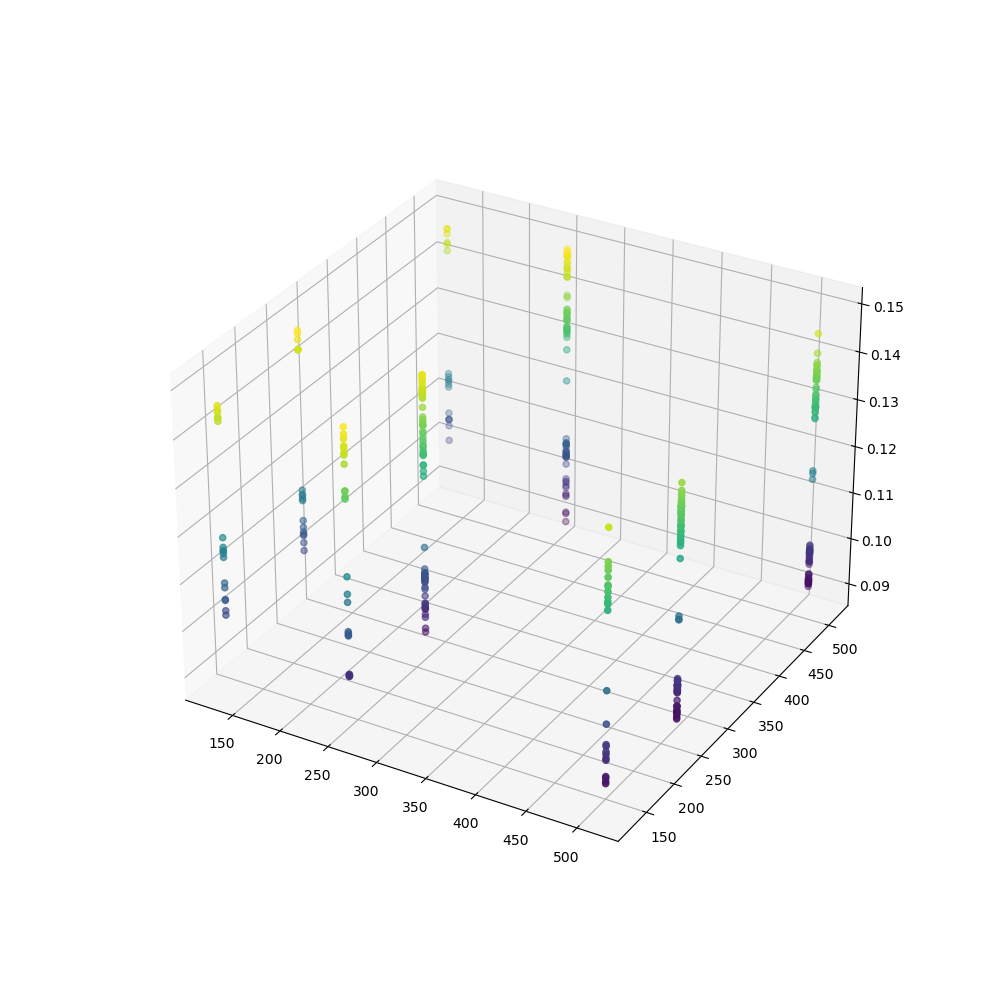

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
x=mp[mp.Amplitude < 0.15].NombreSousEchantillons.tolist()
y=mp[mp.Amplitude < 0.15].TailleSousEchantillons.tolist()
z=mp[mp.Amplitude < 0.15].Amplitude.tolist()
ax.scatter(x, y, z, zdir='z', s=20, c=z, depthshade=True)

## Récupération des paramètres
Pour un des modèles. Parcours le répertoire "CadreExperimental" s'il existe, pour repérer un fichier modèle.
Si le modèle n'est pas trouvé, fait un entrainement avec les métaparamètres.
Retourne les dits parametres.

In [47]:
cadreExperimental=mn.CadreExperimental(nombrePhases=512,\
                    premierePhase=35,\
                    tailleSousEchantillons=512,\
                    nombreSousEchantillons=512).recupere(rondeEffective=49)

Hardware utilisé : cuda:0
Métaparamètres: 512 phases (première 35), 512 sous échantillons de taille 512 (periode 1.0)


### Au choix selon les besoins et les environnements

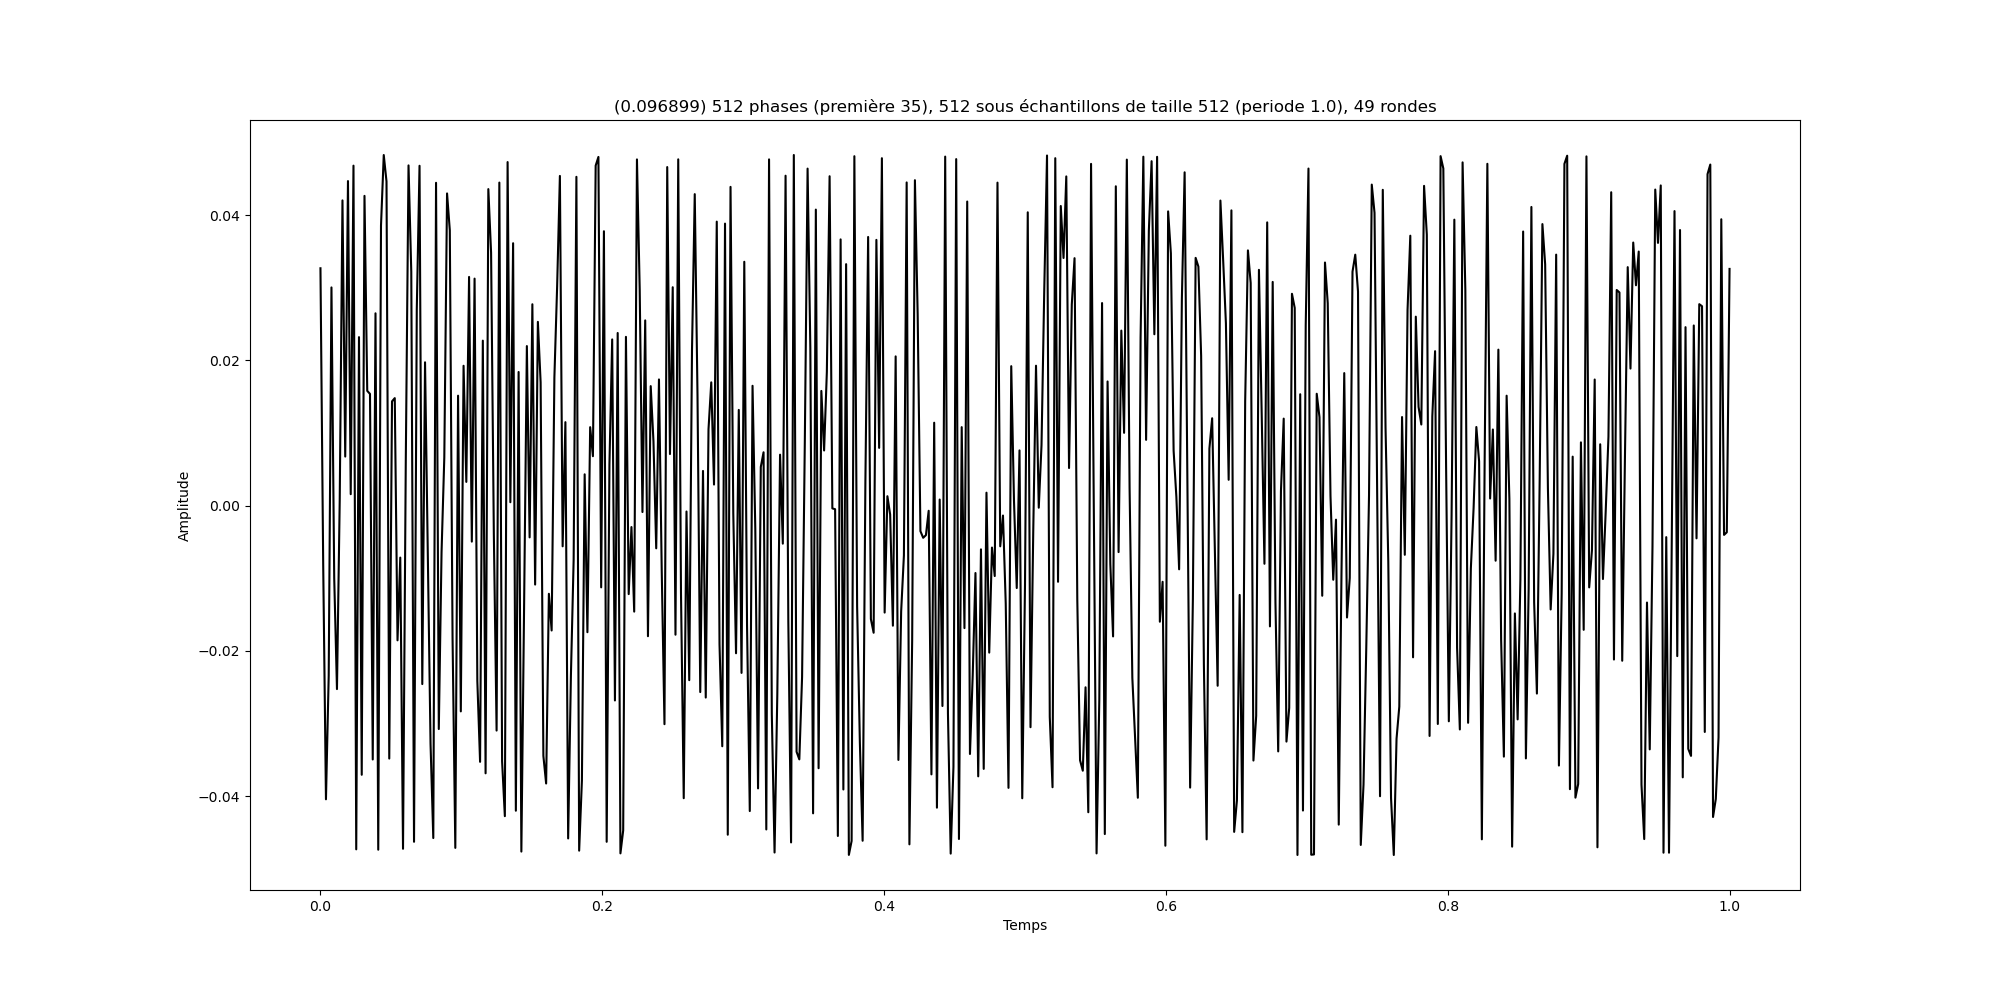

In [46]:
cadreExperimental.dessine()

In [9]:
cadreExperimental.parametres()

array([ 3.00624728e+00,  1.73065102e+00,  7.62179941e-02,  3.56051660e+00,
        1.23533174e-01,  4.45020628e+00,  4.54474211e+00,  1.11517096e+00,
        8.71704996e-01,  3.38532639e+00,  2.42099036e-02,  4.65832901e+00,
        1.98458302e+00,  3.87046957e+00,  4.78424168e+00,  4.00767446e-01,
        4.83183479e+00,  2.16324544e+00,  3.85440207e+00,  2.44560981e+00,
        8.92692283e-02,  4.54748201e+00,  2.50384831e+00,  1.41054010e+00,
        3.09583187e+00,  2.67471933e+00,  4.54875374e+00,  3.10672235e+00,
        8.38434577e-01,  2.46728468e+00,  4.46058607e+00,  4.10281515e+00,
        1.62741673e+00,  1.37901843e+00,  3.11779690e+00,  4.32916594e+00,
        3.91643429e+00,  2.22403121e+00,  4.26994038e+00,  5.54040480e+00,
        3.93418336e+00,  3.62484038e-01,  3.14662147e+00,  1.26871502e+00,
        1.43496454e-01,  1.27328837e+00,  1.40472686e+00,  4.41072464e+00,
        3.59973001e+00,  2.62234187e+00,  4.64681244e+00,  2.41524291e+00,
        3.30267239e+00,  

In [15]:
repr(cadreExperimental.parametres())

'array([ 1.33639252e+00,  1.14045489e+00,  1.84557247e+00,  2.79906893e+00,\n        3.93980622e+00,  3.49756145e+00,  4.58889216e-01,  2.93565512e+00,\n        1.03051031e+00,  1.72206366e+00,  1.39855480e+00,  3.97399843e-01,\n        8.23074996e-01,  9.16082084e-01,  2.58760905e+00,  1.71813273e+00,\n        2.56488204e+00,  3.97467494e-01, -2.66187996e-01,  2.47383046e+00,\n        1.16348171e+00,  4.01530695e+00,  4.52333355e+00,  1.58986342e+00,\n        2.97458720e+00,  3.79827642e+00, -5.41315138e-01,  2.39304137e+00,\n        4.94043350e-01,  5.14372301e+00,  3.08809233e+00,  1.78929436e+00,\n        3.67938352e+00,  4.11720932e-01,  3.12589264e+00,  1.94127905e+00,\n        1.73954129e+00,  1.22670770e+00,  4.62803841e+00,  2.01386189e+00,\n       -4.36709486e-02,  4.91336155e+00,  3.68978930e+00,  4.81444693e+00,\n        5.98662376e+00,  9.19272304e-01,  4.16940212e+00,  3.50847650e+00,\n        3.28648496e+00,  1.83647096e+00,  5.82833338e+00,  3.25723052e+00,\n        2.1

### Génération de modèles au hasard

In [10]:
import random
amplitudeTest=2
for i in range(20):
    cadreExperimental = mn.CadreExperimental(
        nombrePhases = random.randint(200, 550),
        tailleSousEchantillons = random.randint(200, 550),
        nombreSousEchantillons = random.randint(200, 550),
        premierePhase = random.randint(10, 20))
    if (amplitudeTest > cadreExperimental.entraine(nombreRondes = random.randint(40, 50), dessine=0, trace=1).amplitudeTest):
        cadreExperimental.sauve(sauveParametres=True)
        amplitudeTest=cadreExperimental.amplitudeTest
    else:
        cadreExperimental.sauve(sauveParametres=False)
amplitudeTest


AssertionError: 

### Génération d'une grille de modèles

In [31]:
import random

amplitudeTest=2
for nombrePhases in [256, 512]:
    for premierePhase in [10, 15, 20]:
        for tailleSousEchantillons in [256, 512]:
            for nombreSousEchantillons in [256, 512]:
                cadreExperimental = mn.CadreExperimental(
                    nombrePhases=nombrePhases,\
                    premierePhase=premierePhase,\
                    tailleSousEchantillons=tailleSousEchantillons,\
                    nombreSousEchantillons=nombreSousEchantillons,
                    tailleBatch=nombreSousEchantillons)
                if (amplitudeTest > cadreExperimental.entraine(nombreRondes = random.randint(40, 50), dessine=0, trace=1).amplitudeTest):
                    cadreExperimental.sauve(sauveParametres=True)
                    amplitudeTest=cadreExperimental.amplitudeTest
                else:
                    cadreExperimental.sauve(sauveParametres=False)
amplitudeTest

Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 256 sous échantillons de taille 256 (periode 1.0)
Nombre prévu de rondes 49, patience: 3, amplitude initiale: 0.298735
Ronde 49, Amplitude(test): 0.176449
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 512 sous échantillons de taille 256 (periode 1.0)
Nombre prévu de rondes 45, patience: 3, amplitude initiale: 0.277253
Ronde 45, Amplitude(test): 0.180249
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 256 sous échantillons de taille 512 (periode 1.0)
Nombre prévu de rondes 45, patience: 3, amplitude initiale: 0.296574
Ronde 45, Amplitude(test): 0.186950
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 512 sous échantillons de taille 512 (periode 1.0)
Nombre prévu de rondes 47, patience: 3, amplitude initiale: 0.331153
Ronde 47, Amplitude(test): 0.185924
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 15), 256 sous échantillons de taille 256 (per

tensor(0.1243, device='cuda:0')

In [8]:
amplitudeTest=2
for nombrePhases in [256, 512]:
    for premierePhase in [12, 24, 35]:
        for tailleSousEchantillons in [128, 256, 512]:
            for nombreSousEchantillons in [128, 256, 512]:
                for rondes in [25, 50]:
                    cadreExperimental = mn.CadreExperimental(
                        nombrePhases=nombrePhases,\
                        premierePhase=premierePhase,\
                        tailleSousEchantillons=tailleSousEchantillons,\
                        nombreSousEchantillons=nombreSousEchantillons,
                        tailleBatch=nombreSousEchantillons)
                    if (amplitudeTest > cadreExperimental.entraine(nombreRondes = rondes, dessine=0, trace=1).amplitudeTest):
                        cadreExperimental.sauve(sauveParametres=True)
                        amplitudeTest=cadreExperimental.amplitudeTest
                    else:
                        cadreExperimental.sauve(sauveParametres=False)
amplitudeTest

Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 12), 128 sous échantillons de taille 128 (periode 1.0)
Nombre prévu de rondes 25, patience: 3, amplitude initiale: 0.261862
Ronde 25, Amplitude(test): 0.156385
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 12), 128 sous échantillons de taille 128 (periode 1.0)
Nombre prévu de rondes 50, patience: 3, amplitude initiale: 0.285762
Ronde 50, Amplitude(test): 0.143367
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 12), 256 sous échantillons de taille 128 (periode 1.0)
Nombre prévu de rondes 25, patience: 3, amplitude initiale: 0.273158
Ronde 25, Amplitude(test): 0.145066
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 12), 256 sous échantillons de taille 128 (periode 1.0)
Nombre prévu de rondes 50, patience: 3, amplitude initiale: 0.288446
Ronde 28, Amplitude(test): 0.143685
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 12), 512 sous échantillons de taille 128 (per

tensor(0.0909, device='cuda:0')

In [ ]:
# Cette cellule Notebook doit être activée seulement dans Google Colab
# Elle permet de monter l'environnement dans ce contexte
# import os
# if not os.path.exists('thinkdsp.py'):
#    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
# faire "!pip install scipy" dans une cellule si le package n'est pas présent

In [1]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)

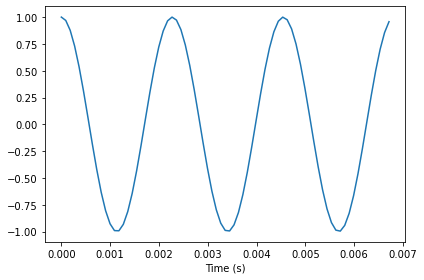

In [2]:
from thinkdsp import decorate

cos_sig.plot()
decorate(xlabel='Time (s)')

In [3]:
mix = sin_sig + cos_sig
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

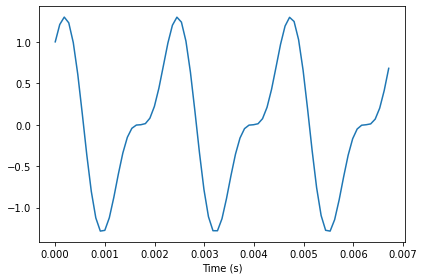

In [4]:
mix.plot()
decorate(xlabel='Time (s)')

In [5]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [6]:
wave.ys

array([1.        , 1.209102  , 1.29840734, ..., 0.14744616, 0.33476757,
       0.58844095])

In [7]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [8]:
wave.make_audio()